# Aceleradev Codenation | Semana 3


O que significa cada coluna:
* City = cidade
* Area = área do imóvel
* rooms = qnts quartos
* bathrooms = qnts banheiro
* parking spaces = número de vagas 
* floor = andar
* animal = aceita animais?
* furniture = é mobilhada?
* hoa = valor do condomínio
* rent amount = valor do aluguel 
* property tax = iptu
* fire insurance = seguro incendio
* total = valor total

In [1]:
#Importando os pacotes necessários
import pandas as pd 

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [4]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Importante: SEMPRE checar como esta a base de dados 

In [8]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [10]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Problema: Explorar o valor do aluguel(RENT AMOUNT)
### Usando estatística univariada

In [14]:
#renomeia coluna para ter uma melhor manipulação dos dados
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [15]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [16]:
#média
df['valor_aluguel'].mean()

3896.247194163861

In [17]:
#mediana
df['valor_aluguel'].median()

2661.0

Com esses valores de média e mediana pode-se inferir que existem valores de aluguel que estão muito altos, isso implica em uma mediana muito distante da média

In [18]:
#desvio padrão
df['valor_aluguel'].std()

3408.5455176710675

O valor do desvio padrão é quase o valor da média o que me diz que meus dados são muito esparsos

In [19]:
#análise descritiva
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

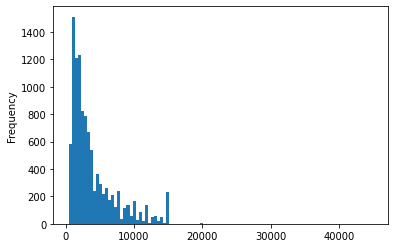

In [26]:
#visualização gráfica com histogramas 
#Frequência de um valor
df['valor_aluguel'].plot(kind = 'hist', bins = 100) #BINS = SEGMENTAÇÕES

In [27]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [28]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()

4.624228179818687

### Exploração multivariada
##### Estamos atrás de:
* Perguntas
    - Qual a cidade com a média de aluguel mais alta?
    - Quantos banheiros existem nas residenciais com os alugueis mais caros?
    - Os imoveis mais caros aceitam animais?
    - Os imoveis mais caros são mobiliados?
    
* Hipóteses
    - SP é a cidade com o aluguel mais caro
    - Quanto mais banheiros em um imovel maior o valor do aluguel
    - Os imoveis com mobilia tem o aluguem mais caro

In [33]:
#Respondendo a pergunta: qual a cidade com a média de aluguel mais alta?
#estou agrupando por cidade o valor do aluguel 
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [34]:
#Respondendo a pergunta: Quantos banheiros existem nas residenciais com os alugueis mais caros?
#Definição: alugueis mais altos são valores acima de 5000
df['aluguel_alto'] = ["Alto" if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [35]:
df['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [36]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

Trabalhando com hipóteses => correlação


In [37]:
#hipotese: Quanto mais banheiros em um imovel maior o valor do aluguel
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [38]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [44]:
#cria uma lista das colunas que são do tipo int
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [49]:
#correlação dos valores inteiros com o preço do aluguel
for coluna in lista:   
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))
    print('---')

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
---
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
---
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
---
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
---
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
---
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
---
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
---
fi

### Visualização de dados

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

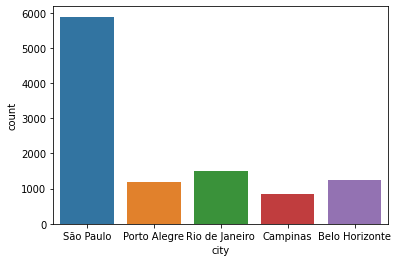

In [52]:
#Forma gráfica
sns.countplot(x = 'city', data = df)

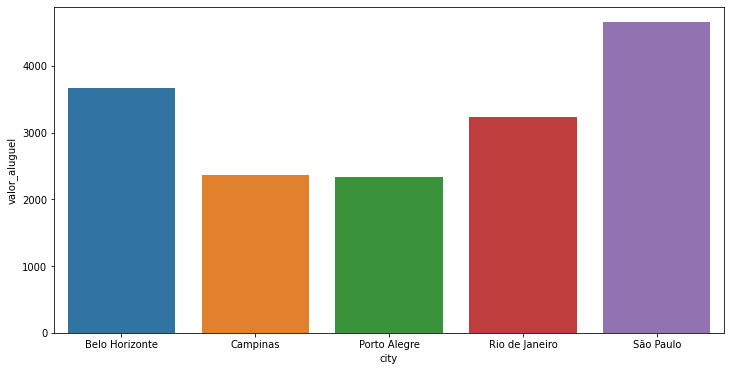

In [60]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())

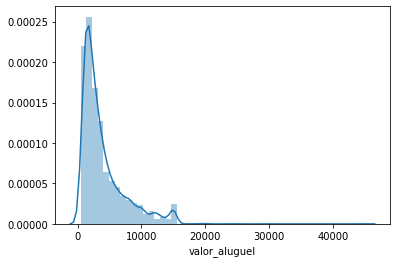

In [62]:
sns.distplot(df['valor_aluguel'])

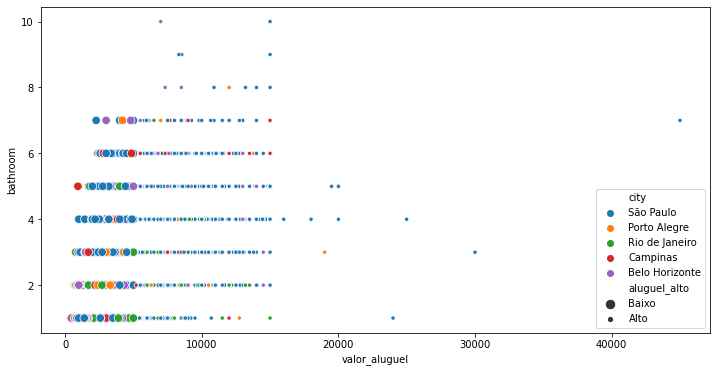

In [66]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city', size = 'aluguel_alto',data = df)

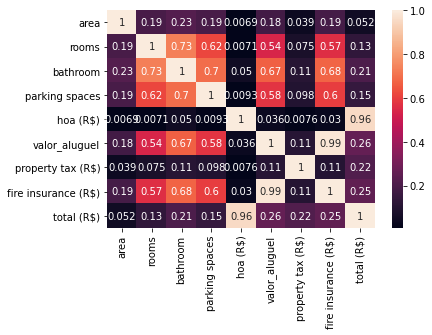

In [67]:
sns.heatmap(df.corr(), annot = True)

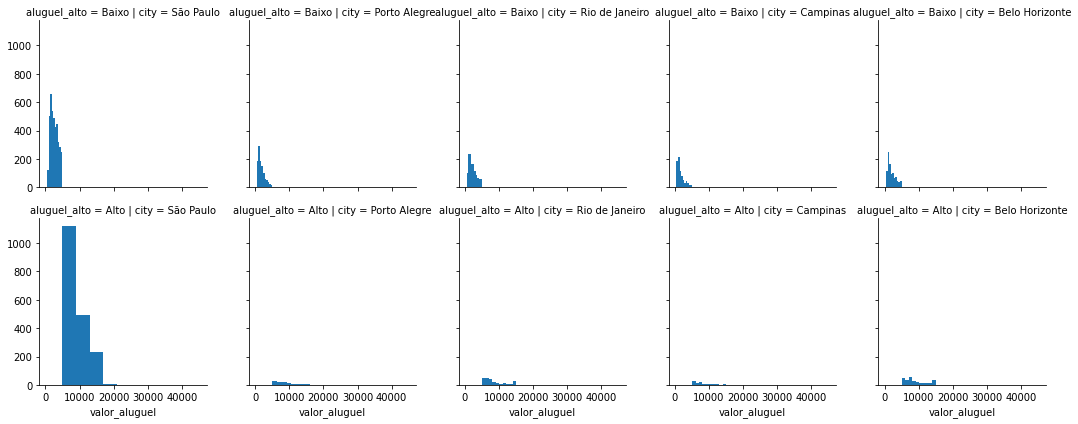

In [69]:
g = sns.FacetGrid(df, col="city", row="aluguel_alto")
g = g.map(plt.hist, "valor_aluguel")